In [1]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import svm
import pandas as pd
import numpy as np

from PIL import Image, ImageFilter

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
def image_prep(argv):
    """
    This function returns the pixel values.
    The imput is a png file location.
    """
    im = Image.open(argv).convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    newImage = Image.new('L', (28, 28), (255))  # creates white canvas of 28x28 pixels

    if width > height:  # check which dimension is bigger
        # Width is bigger. Width becomes 20 pixels.
        nheight = int(round((20.0 / width * height), 0))  # resize height according to ratio width
        if (nheight == 0):  # rare case but minimum is 1 pixel
            nheight = 1
            # resize and sharpen
        img = im.resize((20, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))  # calculate horizontal position
        newImage.paste(img, (4, wtop))  # paste resized image on white canvas
    else:
        # Height is bigger. Heigth becomes 20 pixels.
        nwidth = int(round((20.0 / height * width), 0))  # resize width according to ratio height
        if (nwidth == 0):  # rare case but minimum is 1 pixel
            nwidth = 1
            # resize and sharpen
        img = im.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))  # caculate vertical pozition
        newImage.paste(img, (wleft, 4))  # paste resized image on white canvas

    tv = list(newImage.getdata())  # get pixel values

    # normalize pixels to 0 and 1. 0 is pure white, 1 is pure black.
    tva = np.array([(255 - x) * 1.0 for x in tv])
    return tva

In [3]:
def number_predict(img, model):
    x=image_prep(img)
    prediction = model.predict(np.array([x]))
    print(prediction[0])
    reshaped_x = x.reshape(28,28)
    plt.imshow(reshaped_x, cmap=matplotlib.cm.binary, interpolation="nearest")

In [4]:
mnist = pd.read_json('mnist_784.json')

In [5]:
mnist

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [6]:
train, test = train_test_split(mnist, test_size=0.2)

In [7]:
y_train, y_test = train.target.reset_index(drop=True), test.target.reset_index(drop=True)
X_train, X_test = train.drop('target', axis=1).reset_index(drop=True), test.drop('target', axis=1).reset_index(drop=True)

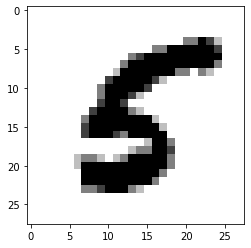

In [8]:
random_digit = X_test.iloc[2].to_numpy()
reshaped_random_digit = random_digit.reshape(28,28)
plt.imshow(reshaped_random_digit, cmap=matplotlib.cm.binary, interpolation="nearest")

In [9]:
y_train_9 = np.array((y_train == 9))
y_test_9 = np.array((y_test == 9))

In [10]:
clf_LR = LogisticRegression(tol=0.1, max_iter=100)

In [11]:
clf_LR.fit(X_train, y_train_9)

LogisticRegression(tol=0.1)

In [12]:
y_pred_LR = clf_LR.predict(X_test)

In [13]:
y_pred_LR

array([False, False, False, ..., False, False, False])

In [14]:
a_CLR = cross_val_score(clf_LR, X_test, y_test_9, cv=3, scoring="accuracy")

In [15]:
a_CLR.mean()

0.9503571525553576

In [16]:
accuracy_score(y_test_9,y_pred_LR)

0.9596428571428571

In [17]:
clf_SVC = svm.SVC()

In [18]:
clf_SVC.fit(X_train, y_train_9)

SVC()

In [19]:
y_pred_SVC = clf_SVC.predict(X_test)

In [20]:
y_pred_SVC

array([False, False, False, ..., False, False, False])

In [21]:
a_SVC = cross_val_score(clf_SVC, X_train, y_train_9, cv=3, scoring="accuracy")

In [22]:
a_SVC.mean()

0.9904642904914529

In [23]:
accuracy_score(y_test_9,y_pred_SVC)

0.9922857142857143

In [24]:
clf_LR_all = LogisticRegression(tol=0.1, max_iter=100)

In [25]:
clf_LR_all.fit(X_train, y_train)

LogisticRegression(tol=0.1)

In [26]:
y_pred_LR_all = clf_LR_all.predict(X_test)

In [27]:
y_pred_LR_all

array([5, 1, 5, ..., 3, 3, 2], dtype=int64)

In [28]:
accuracy_score(y_test,y_pred_LR_all)

0.9204285714285714

In [29]:
a_LR_all = cross_val_score(clf_LR_all, X_train, y_train, cv=3, scoring="accuracy")

In [30]:
a_LR_all.mean()

0.916642849436497

In [31]:
clf_guass = GaussianNB()

In [32]:
clf_guass.fit(X_train, y_train)

GaussianNB()

In [33]:
a_gauss = cross_val_score(clf_guass, X_train, y_train, cv=3, scoring="accuracy")

In [34]:
a_gauss.mean()

0.5670718858927786

In [35]:
y_pred_guass = clf_guass.predict(X_test)

In [36]:
y_pred_guass

array([8, 1, 8, ..., 3, 8, 6], dtype=int64)

In [37]:
accuracy_score(y_test,y_pred_guass)

0.5566428571428571

In [38]:
#PREDICT
prediction = clf_guass.predict(random_digit.reshape(1,-1))

In [39]:
prediction

array([8], dtype=int64)

7


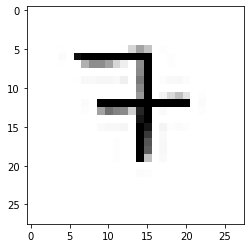

In [40]:
x=number_predict('./seven.png', clf_LR_all)